In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc, cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_network

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
comp_points = [[1., 0.5], [2.8, 1.6], [3., 0.5], [2., 0.5]]

### No delay, use 0 to make 1 oscillate

target oscillation period =  10.975999999999999


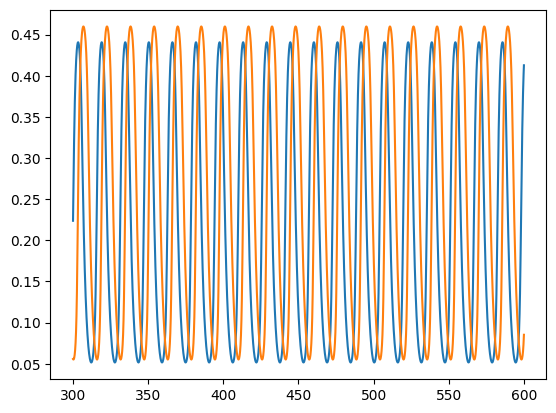

In [34]:
cmat = np.array( [[0., 0.], [1., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
dmat = np.array( [[0., 0.], [0., 0.]] ) # delay from 0 to 1

controlmat = np.zeros((2,2))
controlmat[0,0] = 1.

costmat = np.array( [[0., 0.], [1., 0.]] )

model = WCModel(Cmat=cmat, Dmat=dmat)

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 1000 # Simulation time, ms
model.params["exc_ext"] = 2.
model.params["inh_ext"] = 0.5

model.run()

peaks = scipy.signal.find_peaks(model.exc[0,100:])[0]
plist = []
for pind in range(1, len(peaks)):
    plist.append(model.params.dt * (peaks[pind]-peaks[pind-1]))

period = np.around(np.mean(plist),2)
target_period = 0.7*period
print("target oscillation period = ", target_period)

plt.plot(model.t[3000:6000], model.exc[0,3000:6000])
plt.plot(model.t[3000:6000], model.exc[1,3000:6000])
plt.show()

duration = 200.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( (zero_input0, zero_input0))
zero_control0 = np.concatenate( (zero_input,zero_input), axis=0)[np.newaxis,:,:]
zero_control = np.vstack( (zero_control0, zero_control0))

results = dict()
w2_array = [1e-3, 1e-5]
results["controls"] =  [ [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ] ]

target_period = 1.5*period
int0 = int( (duration - 8. * target_period) / model.params.dt)
print(int0)

--------------------------------
--------------------------------
--------------------------------
POINT :  [1.0, 0.5]
Target period =  23.52
Optimal control with target oscillation period
L2 cost weight =  0.001
Compute control for a deterministic system
Cost in iteration 0: -0.02619869506292615
Converged in iteration 2 with cost -0.02619869506292615
Final cost : -0.02619869506292615


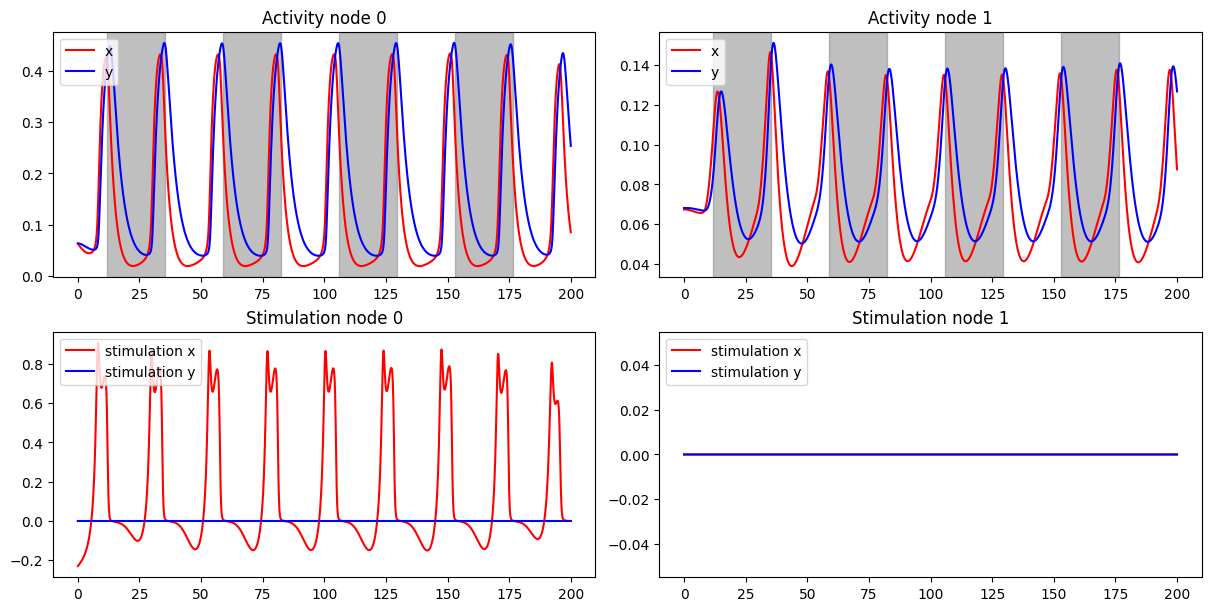

Optimal control with target oscillation period
L2 cost weight =  1e-05
Compute control for a deterministic system
Cost in iteration 0: -0.05030450917603648
Cost in iteration 10: -0.05031263730397399
Cost in iteration 20: -0.050317174247043496
Converged in iteration 28 with cost -0.050317174247043545
Final cost : -0.050317174247043545


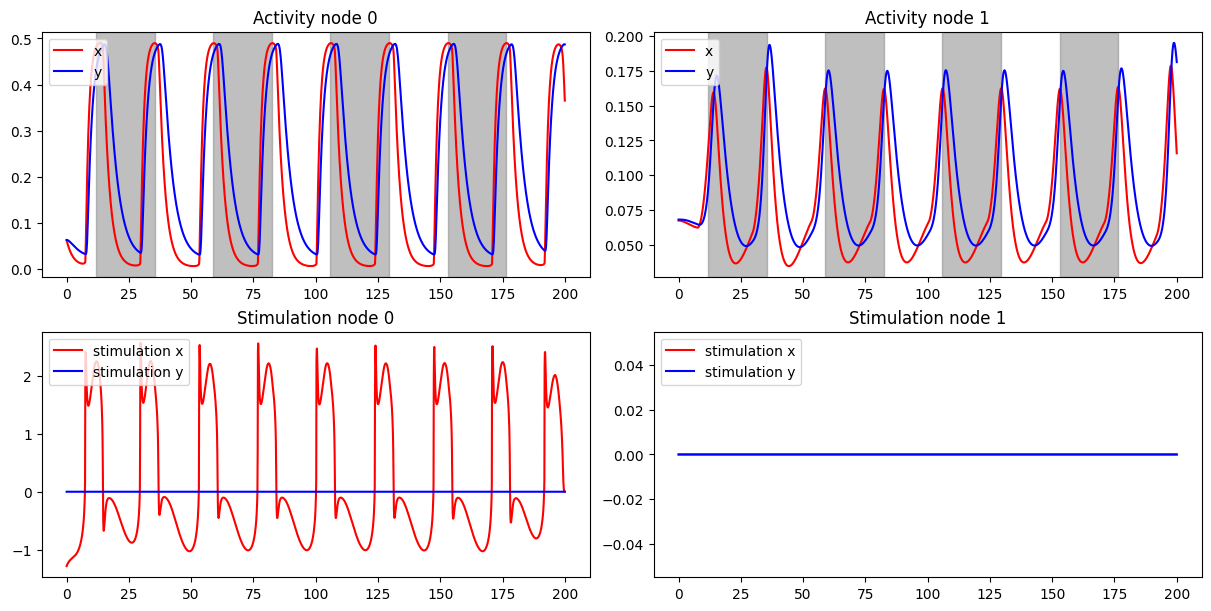

--------------------------------
--------------------------------
--------------------------------
POINT :  [2.8, 1.6]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [3.0, 0.5]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [2.0, 0.5]
Target period =  23.52


In [42]:
it = 100
pr = np.arange(0,101,10)
maxstr = 5.

for pind in range(len(comp_points)):
    p = comp_points[pind]
    print("--------------------------------")
    print("--------------------------------")
    print("--------------------------------")
    print("POINT : ", p)
    print("Target period = ", target_period)

    if pind not in [0]:
        continue

    model.params["exc_ext"] = zero_input + p[0]
    model.params["inh_ext"] = zero_input + p[1]
    model.run()

    model.params["exc_init"] = np.vstack( [model.exc[0,-1], model.exc[1,-1]] )
    model.params["inh_init"] = np.vstack( [model.inh[0,-1], model.inh[1,-1]] )

    for iw in range(len(w2_array)):
        w2 = w2_array[iw]

        if iw not in [0,1]:
            continue

        model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
        model_controlled.maximum_control_strength = maxstr
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_f"] = 1.
        model_controlled.weights["w_2"] = w2
        print("L2 cost weight = ", w2)

        if type(results["controls"][pind][iw]) != type(None):
            model_controlled.control = results["controls"][pind][iw]
            model_controlled.update_input()

        model_controlled.optimize(it)
        results["controls"][pind][iw] = model_controlled.control.copy()

        plot_oc_network(2, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control)

### No delay, use 0 to make both oscillate

In [45]:
cmat = np.array( [[0., 0.], [1., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
dmat = np.array( [[0., 0.], [0., 0.]] ) # delay from 0 to 1

controlmat = np.zeros((2,2))
controlmat[0,0] = 1.

costmat = np.array( [[1., 0.], [1., 0.]] )

model = WCModel(Cmat=cmat, Dmat=dmat)

duration = 200.
model.params.duration = duration

results = dict()
w2_array = [1e-3, 1e-5]
results["controls"] =  [ [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ] ]

--------------------------------
--------------------------------
--------------------------------
POINT :  [1.0, 0.5]
Target period =  23.52
Optimal control with target oscillation period
L2 cost weight =  0.001
Compute control for a deterministic system
Cost in iteration 0: -1.7232077324777874e-11
Cost in iteration 10: -0.24218005012127358
Cost in iteration 20: -0.2435078480962498
Cost in iteration 30: -0.24356760007730976
Cost in iteration 40: -0.24359563357072317
Cost in iteration 50: -0.24361862127478026
Cost in iteration 60: -0.2436383472120869
Cost in iteration 70: -0.24365755763789185
Cost in iteration 80: -0.24367407376461264
Cost in iteration 90: -0.24368762823855677
Cost in iteration 100: -0.24370189006247706
Final cost : -0.24370189006247706


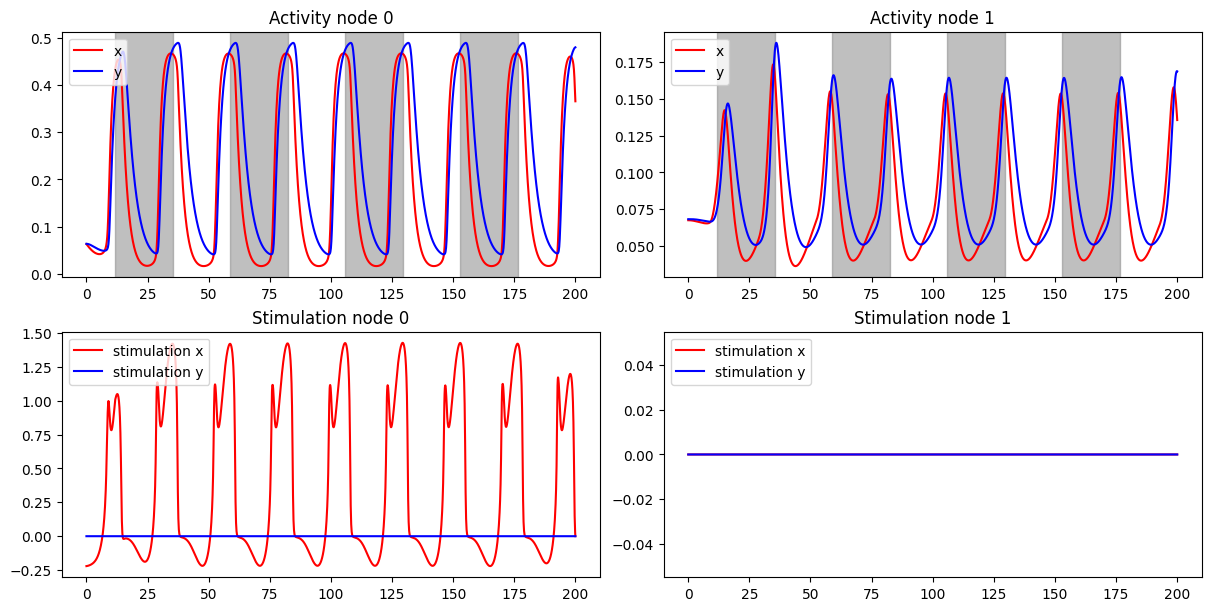

Optimal control with target oscillation period
L2 cost weight =  1e-05
Compute control for a deterministic system
Cost in iteration 0: -1.7232077324777874e-11
Cost in iteration 10: -0.32748857880724186
Cost in iteration 20: -0.327802916269182
Converged in iteration 30 with cost -0.3278030635714206
Final cost : -0.3278030635714206


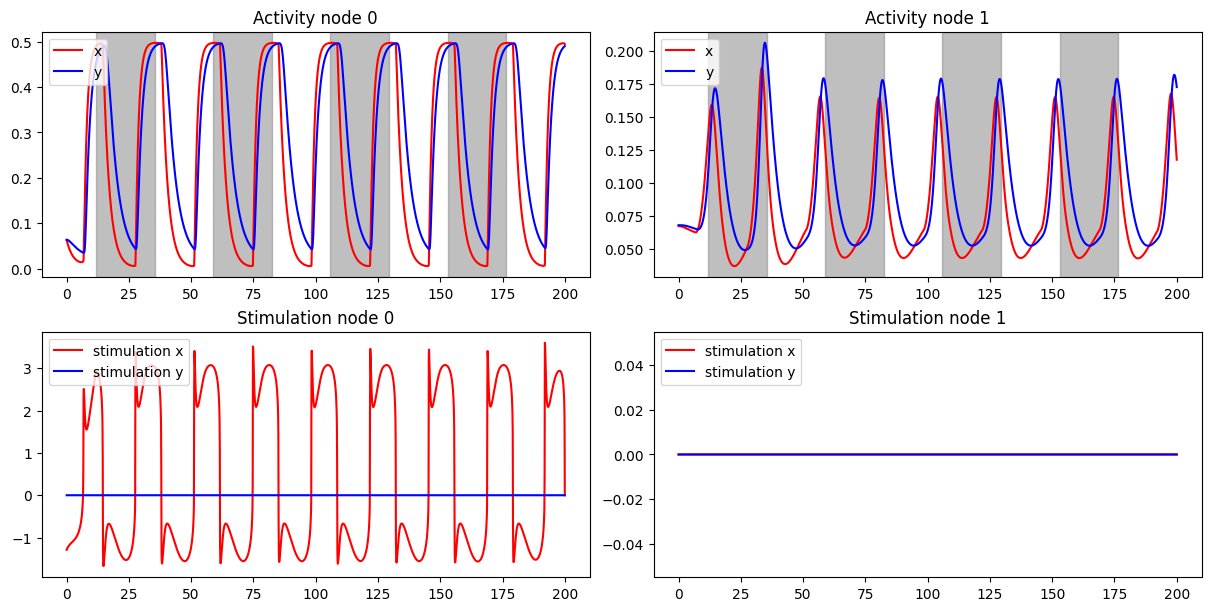

--------------------------------
--------------------------------
--------------------------------
POINT :  [2.8, 1.6]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [3.0, 0.5]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [2.0, 0.5]
Target period =  23.52


In [46]:
it = 100
pr = np.arange(0,101,10)
maxstr = 5.

for pind in range(len(comp_points)):
    p = comp_points[pind]
    print("--------------------------------")
    print("--------------------------------")
    print("--------------------------------")
    print("POINT : ", p)
    print("Target period = ", target_period)

    if pind not in [0]:
        continue

    model.params["exc_ext"] = zero_input + p[0]
    model.params["inh_ext"] = zero_input + p[1]
    model.run()

    model.params["exc_init"] = np.vstack( [model.exc[0,-1], model.exc[1,-1]] )
    model.params["inh_init"] = np.vstack( [model.inh[0,-1], model.inh[1,-1]] )

    for iw in range(len(w2_array)):
        w2 = w2_array[iw]

        if iw not in [0,1]:
            continue

        model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
        model_controlled.maximum_control_strength = maxstr
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_f"] = 1.
        model_controlled.weights["w_2"] = w2
        print("L2 cost weight = ", w2)

        if type(results["controls"][pind][iw]) != type(None):
            model_controlled.control = results["controls"][pind][iw]
            model_controlled.update_input()

        model_controlled.optimize(it)
        results["controls"][pind][iw] = model_controlled.control.copy()

        plot_oc_network(2, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control)

### No delay, use 0 to synchronize

In [47]:
cmat = np.array( [[0., 0.], [1., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
dmat = np.array( [[0., 0.], [0., 0.]] ) # delay from 0 to 1

controlmat = np.zeros((2,2))
controlmat[0,0] = 1.

costmat = np.array( [[1., 0.], [1., 0.]] )

model = WCModel(Cmat=cmat, Dmat=dmat)

duration = 200.
model.params.duration = duration

results = dict()
w2_array = [1e-3, 1e-5]
results["controls"] =  [ [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ] ]

--------------------------------
--------------------------------
--------------------------------
POINT :  [1.0, 0.5]
Target period =  23.52
Optimal control with target oscillation period
L2 cost weight =  0.001
Compute control for a deterministic system
Cost in iteration 0: -0.24369554636958318
Converged in iteration 2 with cost -0.24369554636958318
Final cost : -0.24369554636958318


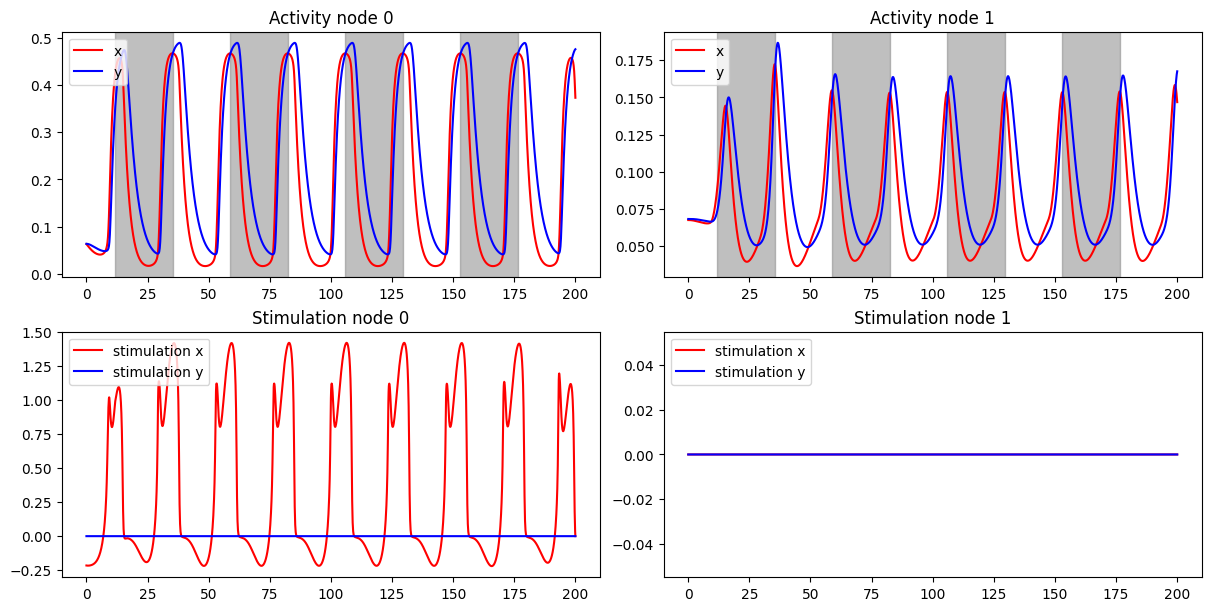

Optimal control with target oscillation period
L2 cost weight =  1e-05
Compute control for a deterministic system
Cost in iteration 0: -0.32609551093514505
Converged in iteration 6 with cost -0.32609551093514505
Final cost : -0.32609551093514505


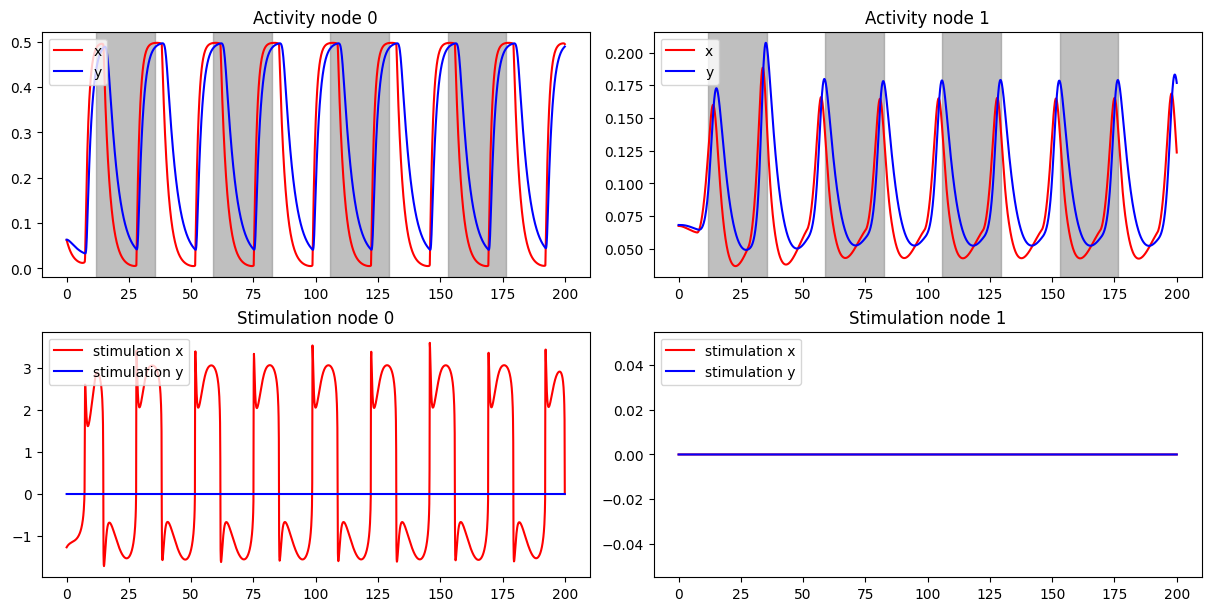

--------------------------------
--------------------------------
--------------------------------
POINT :  [2.8, 1.6]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [3.0, 0.5]
Target period =  23.52
--------------------------------
--------------------------------
--------------------------------
POINT :  [2.0, 0.5]
Target period =  23.52


In [52]:
it = 200
pr = np.arange(0,101,10)
maxstr = 5.

for pind in range(len(comp_points)):
    p = comp_points[pind]
    print("--------------------------------")
    print("--------------------------------")
    print("--------------------------------")
    print("POINT : ", p)
    print("Target period = ", target_period)

    if pind not in [0]:
        continue

    model.params["exc_ext"] = zero_input + p[0]
    model.params["inh_ext"] = zero_input + p[1]
    model.run()

    model.params["exc_init"] = np.vstack( [model.exc[0,-1], model.exc[1,-1]] )
    model.params["inh_init"] = np.vstack( [model.inh[0,-1], model.inh[1,-1]] )

    for iw in range(len(w2_array)):
        w2 = w2_array[iw]

        if iw not in [0,1]:
            continue

        model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
        model_controlled.maximum_control_strength = maxstr
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_f_sync"] = 1.
        model_controlled.weights["w_2"] = w2
        print("L2 cost weight = ", w2)

        if type(results["controls"][pind][iw]) != type(None):
            model_controlled.control = results["controls"][pind][iw]
            model_controlled.update_input()

        model_controlled.optimize(it)
        results["controls"][pind][iw] = model_controlled.control.copy()

        plot_oc_network(2, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control)

### No delay, use 0 to phase-lock

In [53]:
cmat = np.array( [[0., 0.], [1., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
dmat = np.array( [[0., 0.], [0., 0.]] ) # delay from 0 to 1

controlmat = np.zeros((2,2))
controlmat[0,0] = 1.

costmat = np.array( [[1., 0.], [1., 0.]] )

model = WCModel(Cmat=cmat, Dmat=dmat)

duration = 200.
model.params.duration = duration

results = dict()
w2_array = [1e-3, 1e-5]
results["controls"] =  [ [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ], [ None, None, None, None ] ]

In [55]:
it = 100
pr = np.arange(0,101,10)
maxstr = 5.

for pind in range(len(comp_points)):
    p = comp_points[pind]
    print("--------------------------------")
    print("--------------------------------")
    print("--------------------------------")
    print("POINT : ", p)
    print("Target period = ", target_period)

    if pind not in [0]:
        continue

    model.params["exc_ext"] = zero_input + p[0]
    model.params["inh_ext"] = zero_input + p[1]
    model.run()

    model.params["exc_init"] = np.vstack( [model.exc[0,-1], model.exc[1,-1]] )
    model.params["inh_init"] = np.vstack( [model.inh[0,-1], model.inh[1,-1]] )

    for iw in range(len(w2_array)):
        w2 = w2_array[iw]

        if iw not in [0,1]:
            continue

        model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
        model_controlled.maximum_control_strength = maxstr
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_f_pl"] = 1.
        model_controlled.weights["w_2"] = w2
        print("L2 cost weight = ", w2)

        if type(results["controls"][pind][iw]) != type(None):
            model_controlled.control = results["controls"][pind][iw]
            model_controlled.update_input()

        model_controlled.optimize(it)
        results["controls"][pind][iw] = model_controlled.control.copy()

        plot_oc_network(2, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control)

--------------------------------
--------------------------------
--------------------------------
POINT :  [1.0, 0.5]
Target period =  23.52
Optimal control with target oscillation period
L2 cost weight =  0.001
Compute control for a deterministic system
Cost in iteration 0: -0.2436989435260523
